In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sales_df = pd.read_csv("Sales_Data.csv")
sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN,41


In [4]:
sales_df.isnull().sum()

Date                   0
Product Name           0
Product Quantity       0
Units sold             0
Day                    0
Month                  0
Year                   0
DayOfWeek              0
Category               0
DayType                0
Rainfall            2103
Week_of_Year           0
dtype: int64

In [12]:
mean_val = sales_df["Rainfall"].median()
sales_df["Rainfall"] =  sales_df["Rainfall"].fillna(mean_val)

In [13]:
sales_df.isnull().sum()

Date                0
Product Name        0
Product Quantity    0
Units sold          0
Day                 0
Month               0
Year                0
DayOfWeek           0
Category            0
DayType             0
Rainfall            0
Week_of_Year        0
dtype: int64

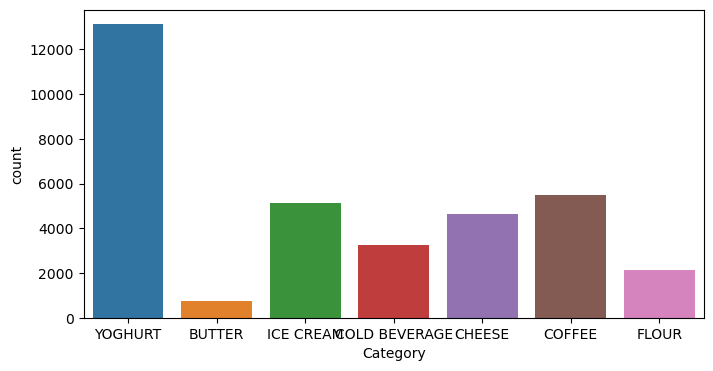

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='Category', data=sales_df)
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_8056\2260853252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array


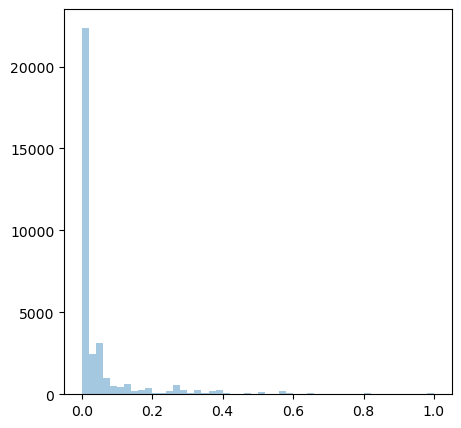

In [15]:
plt.figure(figsize=(5, 5))
sns.distplot(sales_df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
df = sales_df
label_encoder =  LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# the input features (x) and the output variable (y) is defined
input = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target_variable = 'Category'

x = df[input]
y = df[target_variable]

In [18]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# the model is trained
classifier.fit(x_train, y_train)

# the model makes predictions
y_prediction = classifier.predict(x_test)

# the model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

Accuracy: 0.3743664011585807
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       152
       CHEESE       0.00      0.00      0.00       882
       COFFEE       0.17      0.02      0.03      1126
COLD BEVERAGE       0.00      0.00      0.00       635
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.22      0.03      0.05      1052
      YOGHURT       0.38      0.96      0.55      2642

     accuracy                           0.37      6905
    macro avg       0.11      0.14      0.09      6905
 weighted avg       0.21      0.37      0.22      6905



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
